In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import json
import seaborn as sns

In [51]:
# sns.set_style('ticks')
# sns.set_context('paper', font_scale=1.75, rc={'lines.linewidth': 2})
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.75, rc={'lines.linewidth': 2})

In [12]:
fn = '/home/motamedi/Dropbox/workspace/PycharmProjects/charm/WWWPerf/data/top_site_cdn.jsons'
data = {}
for l in open(fn, 'rb'):
    o = json.loads(l)
    data[o['url']] = o['object_size'] 

In [18]:
df = DataFrame.from_dict(data, orient='index')

In [21]:
dft = df.T

In [35]:
df_long = df.unstack().dropna().reset_index()
df_long.columns = [['cdn', 'www', 'size']]
df_long.head()

,cdn,www,size
0,Google,2ch.net,602
1,Google,39.net,27615
2,Google,4shared.com,368450
3,Google,9gag.com,463964
4,Google,about.com,372280


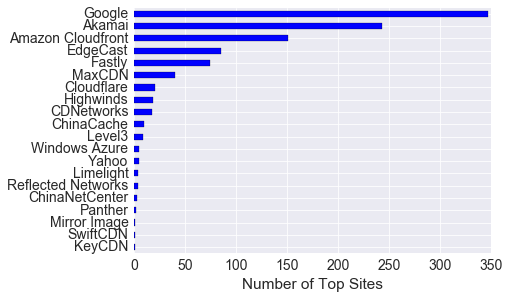

In [78]:
ax = df_long['cdn'].value_counts(ascending=True).plot(kind='barh')
ax.grid('on')
ax.set_xlabel('Number of Top Sites')
fig_name = '/home/motamedi/Dropbox/Apps/ShareLaTeX/ThousandEyes/figs/cdn_usage.pdf'
plt.savefig(fig_name, bbox_inches='tight', format='pdf', dpi=320)

In [79]:
idx = df_long.groupby(['www'])['size'].transform(max) == df_long['size']
df_www_cdn = df_long[idx]
fn = '/home/motamedi/Dropbox/workspace/PycharmProjects/charm/WWWPerf/data/top_site_cdn_max.csv'
df_www_cdn.to_csv(fn, index=None)
len(df_www_cdn)

418

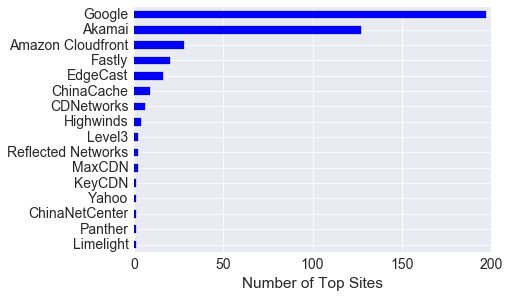

In [77]:
ax = df_www_cdn['cdn'].value_counts(ascending=True).plot(kind='barh')
ax.grid('on')
ax.set_xlabel('Number of Top Sites')
fig_name = '/home/motamedi/Dropbox/Apps/ShareLaTeX/ThousandEyes/figs/cdn_max_usage.pdf'
plt.savefig(fig_name, bbox_inches='tight', format='pdf', dpi=320)